In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
model_base = "CNN_nf1_hd32_nl6_r0.5_l1norm_bs64_ep4_lr0.001"
output_dir = f"./output/{model_base}"

xmin = 0
xmax = 1

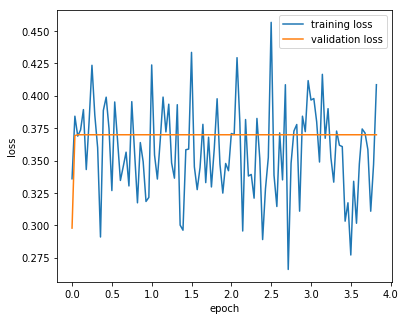

In [20]:
# loss function
fname = f"{output_dir}/log.txt"
data = np.loadtxt(fname)

plt.figure(figsize=(6,5))
plt.ylabel("loss")

#plt.xlabel("iteration")
#plt.plot(data[:,0], data[:,2], label="training loss")
#plt.plot(data[:,0], data[:,3], label="validation loss")

plt.xlabel("epoch")
plt.plot(data[:,1], data[:,2], label="training loss")
plt.plot(data[:,1], data[:,3], label="validation loss")


plt.legend(loc="upper right")

Text(0.5, 0, 'sin(i)')

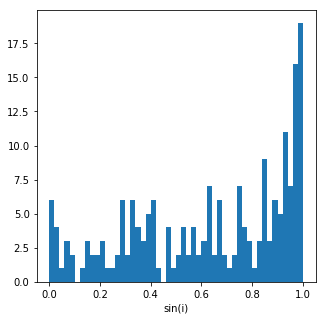

In [25]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

counts, bins = np.histogram(data[:,0], bins=50)
fig = plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("sin(i)")

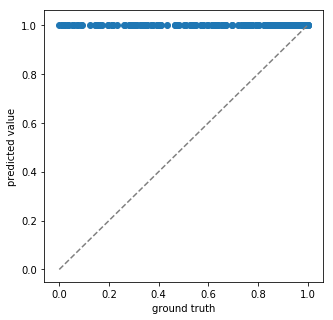

In [26]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

fig = plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1])

plt.xlabel("ground truth")
plt.ylabel("predicted value")

xx = np.linspace(xmin,xmax,10)
plt.plot(xx,xx,ls="--",color="gray")

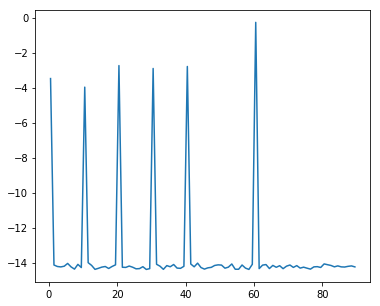

In [13]:
# check pdf distribution
fname = f"{output_dir}/val_dist0.txt"
data = np.loadtxt(fname)

fig = plt.figure(figsize=(6,5))
plt.plot(data[:,0],data[:,1])

plt.xlabel("inclination angle")
plt.ylabel("PDF")

In [13]:
# check test result
fname = f"{output_dir}/test.txt"
data = np.loadtxt(fname)

fig = plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1])

plt.xlabel("ground truth")
plt.ylabel("predicted value")

xx = np.linspace(xmin,xmax,10)
plt.plot(xx,xx,ls="--",color="gray")

OSError: ./output/CNN_nf1_hd32_nl6_r0.5_l1norm_bs64_ep1_lr0.001/test.txt not found.